# RDD of hospitalizations for the lockdown of 20/03/2020

## Imports

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Dataframe

In [2]:
df = pd.read_csv('../data/hospitalisations.csv')
display(df.shape)
display(df.head())

(325, 3)

,Date d'admission,Hors soins intensifs,Aux soins intensifs
0,2020-02-24 00:00:00,3,1
1,2020-02-25 00:00:00,1,1
2,2020-02-26 00:00:00,2,1
3,2020-02-27 00:00:00,1,0
4,2020-02-28 00:00:00,1,1


## Extracting the data that is within a certain time range

In [3]:
df.columns = ["Date", "Regular care", "Intensive care"]
df["Date"] = pd.to_datetime(df["Date"])

In [4]:
time_frame = df["Date"] < "2020-04-16"
df = df[time_frame]

In [5]:
df["total"] = df["Regular care"] + df["Intensive care"]

In [6]:
df["group"] = (df.Date > "2020-03-20").astype(int)

## Running the model

In [71]:
X = pd.DataFrame(df.index)
X.columns = ["time"]

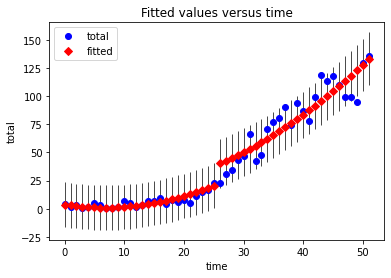

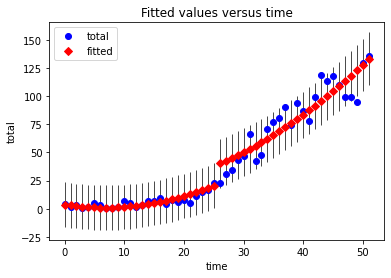

In [74]:
X["group"] = df.group
X["time2"] = X.time ** 2
y = df["total"]

X = sm.add_constant(X)

est = sm.OLS(y, X).fit(cov_type="HC2")

sm.graphics.plot_fit(est, "time")

In [75]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     303.0
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           3.51e-31
Time:                        10:20:37   Log-Likelihood:                -190.48
No. Observations:                  52   AIC:                             389.0
Df Residuals:                      48   BIC:                             396.8
Df Model:                           3                                         
Covariance Type:                  HC2                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6709      1.162      3.159      0.002       1.394       5.948
time          -0.7883      0.203     -3.877      0.000      -1.187      -0.390
group         17.6894      5.224      3.386      0.001       7.451      27.928
time2          0.0584      0.007      8.272      0.000       0.045       0.072
==============================================================================
Omnibus:                        3.005   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                2.145
Skew:                          -0.269   Prob(JB):                        0.342
Kurtosis:                       3.837   Cond. No.                     4.97e+03
==============================================================================

Warnings:
[1] Standard Errors are heteroscedasticity robust (HC2)
[2] The condition number is large, 4.97e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Analysis

#### Amount of time before cutoff: 
25 days on both sides

#### Polynomial used: 
Squared

#### Other regression design considerations:
Attempted without polynomials. Results were just a very straight line with mild regression fit on graph. R-squared is 0.880 . I'll be honest this one confuses me because the graph doesn't properly reflect that R-squared score.

Attempted with polynomials squared and cubed. Results were very well fitted. In fact the curve was too well fitted, the gap was there but the shapes of the slopes were too aligned, making it seem like there was no gap. The R-squared was 0.958

### Explanation of findings:
Based on a few experimental runs, I found that running the data with a squared polynomial made the regression line fit the  data much better. Running the model with both squared and cubed polynomials made the regression line fit the data far too well, rendering the RDD seemingly pointless because the slopes were too well aligned, despite the gap included on the cutoff date. At first glance, running with both squared and cubed removed the gap but on closer inspection I could see that it was still there, but the regression line was simply too perfectly aligned and created a quick illusion of no gap being present. However the gap was also significantly smaller when running with both polynomials and I opted to use simply the squared polynomial. 

Running the model without a polynomial made the regression line look terrible for the data. Very little fit, though the summary would say otherwise, with an R-squared of 0.88 . But as with the case above, the regression line simply works better with one degree of polynomial.

With a degree of polynomial fitted in the model, the regression takes a more realistic shape to what we expect the data to look like given the situation. A slow but steady increase before the lockdown, which triggers the event. After the lockdown however we see a sharper increase in cases over time. The regression is accurately reflecting what happened in March of last year right after the lockdown. Too many people had been exposed and the number of confirmed cases were going up rapidly as more people found out they were infected. The data shows this as well, however it is a little more scattered because real world data is never normalized.